# Flight Price Prediction
#### Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

#### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None

In [2]:
df = pd.read_excel(r'C:\Users\prate\Downloads\Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [5]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


We see that there is only 1 missing value in the dataset hence we could delete it

In [6]:
df.drop(9039,axis=0,inplace=True)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We do not see any Null values in the dataset any more

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


We see 1 have only 1 columns as int rest are object type

##### Working on Date_of_Journey.

In [9]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

The entire data is for 2019, so we would not take year into consideration.

In [10]:
df['Dep_Date'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Dep_Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Date,Dep_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9


##### Working on Dep_Time.

In [11]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [12]:
df['Dep_hours'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_mins'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25


##### Working on Arrival_Time.

In [13]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [14]:
df['Arrival_Day'] = pd.to_datetime(df['Arrival_Time']).dt.day
df['Arrival_Month'] = pd.to_datetime(df['Arrival_Time']).dt.month
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,22,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,8,6,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,10,6,4,25


##### Working on Duration.

In [15]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [16]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.strip('h')
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.strip('m')
df.drop(6474,axis=0,inplace=True)
df['Duration_min'] = df['Duration_min'].fillna(0)
df['Duration_hour'] = df['Duration_hour'].astype(int)*60
df['Duration_min'] = df['Duration_min'].astype(int)
df['Duration'] = df['Duration_hour']+df['Duration_min']
df.drop(['Duration_hour','Duration_min'],axis=1,inplace=True)
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,22,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,8,6,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,10,6,4,25


##### Working on Additional_Info

In [17]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [18]:
df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

We see that around 80% of the data is No-info hence we could drop the columns.

In [19]:
df.drop('Additional_Info',axis=1,inplace=True)

##### Working on Route

In [20]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [21]:
df['Stop1'] = df['Route'].str.split(' → ').str[0]
df['Stop2'] = df['Route'].str.split(' → ').str[1]
df['Stop3'] = df['Route'].str.split(' → ').str[2]
df['Stop4'] = df['Route'].str.split(' → ').str[3]
df['Stop5'] = df['Route'].str.split(' → ').str[4]
df = df.fillna('None')
df.drop('Route',axis=1,inplace=True)
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,22,20,22,3,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,5,50,8,6,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,9,25,10,6,4,25,DEL,LKO,BOM,COK,None


##### Working on Total_Stops

In [22]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [23]:
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [24]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,22,20,22,3,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,2,7662,5,1,5,50,8,6,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,1140,2,13882,6,9,9,25,10,6,4,25,DEL,LKO,BOM,COK,None


### Visualization

In [25]:
cols = ['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Dep_Month', 'Dep_hours']

Airline vs Price


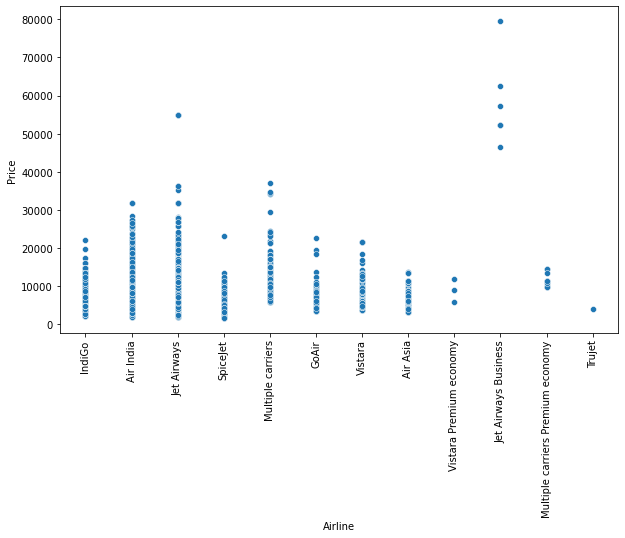

Source vs Price


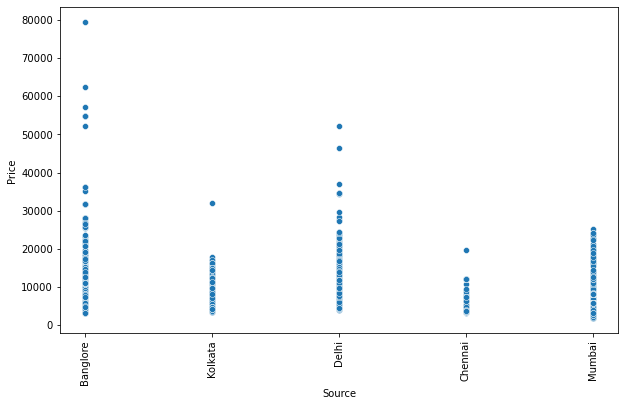

Destination vs Price


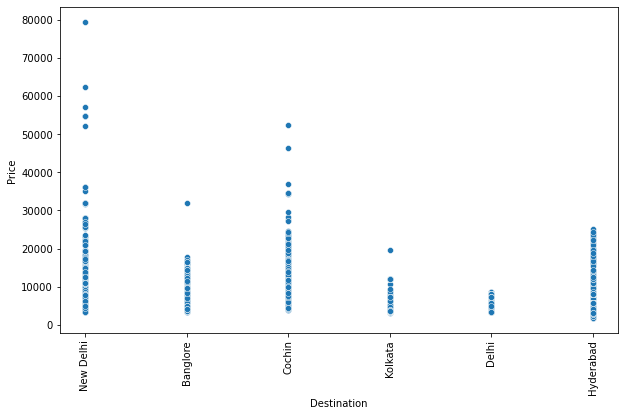

Duration vs Price


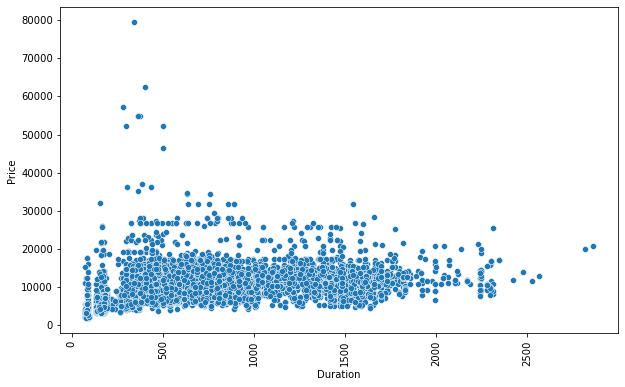

Total_Stops vs Price


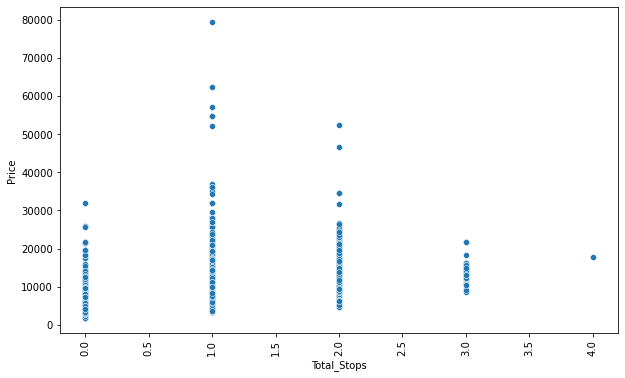

Dep_Month vs Price


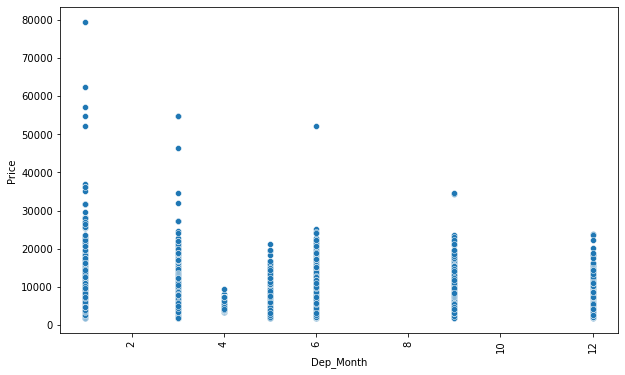

Dep_hours vs Price


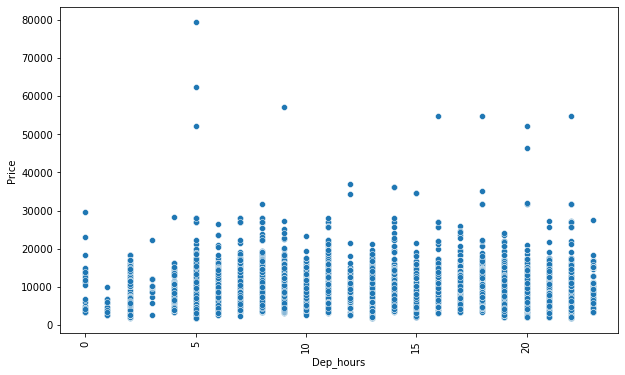

In [26]:
for i in cols:
    print(i,'vs Price')
    plt.figure(figsize=(10,6))
    sns.scatterplot(data = df, x=i, y='Price')
    plt.xticks(rotation=90)
    plt.show()

##### Observations:
    - Prices for Jet Airways are the highest.
    - Airlines flying out of Bangalore tend to have higher Fare
    - Airlines flying to New Delhi tend to have Higher Fare.
    - We have 2 Delhi in Destination (New Delhi and Delhi) where as Delhi has just ` IGi-Aiport.
    - Prices for Flight duraion between 200-500 mins tends to be on Higher End.

In [27]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [28]:
df['Destination'] = df['Destination'].replace('New Delhi','Delhi')

In [29]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

### Encoding object type columns

In [30]:
df = pd.get_dummies(df,columns=['Airline','Source','Destination'])

In [31]:
df.dtypes

Duration                                      int32
Total_Stops                                   int64
Price                                         int64
Dep_Date                                      int64
Dep_Month                                     int64
Dep_hours                                     int64
Dep_mins                                      int64
Arrival_Day                                   int64
Arrival_Month                                 int64
Arrival_Hour                                  int64
Arrival_Minute                                int64
Stop1                                        object
Stop2                                        object
Stop3                                        object
Stop4                                        object
Stop5                                        object
Airline_Air Asia                              uint8
Airline_Air India                             uint8
Airline_GoAir                                 uint8
Airline_Indi

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df['Stop1'] = le.fit_transform(df['Stop1'])
df['Stop2'] = le.fit_transform(df['Stop2'])
df['Stop3'] = le.fit_transform(df['Stop3'])
df['Stop4'] = le.fit_transform(df['Stop4'])
df['Stop5'] = le.fit_transform(df['Stop5'])

In [34]:
df

,Duration,Total_Stops,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,170,0,3897,24,3,22,20,22,3,1,10,0,10,21,10,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,445,2,7662,5,1,5,50,8,6,13,15,2,20,1,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1140,2,13882,6,9,9,25,10,6,4,25,3,27,4,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,325,1,6218,5,12,18,5,8,6,23,30,2,29,3,10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,285,1,13302,3,1,16,50,8,6,21,35,0,29,7,10,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,4107,4,9,19,55,8,6,22,25,2,5,21,10,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10679,155,0,4145,27,4,20,45,8,6,23,20,2,5,21,10,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10680,180,0,7229,27,4,8,20,8,6,11,20,0,10,21,10,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
10681,160,0,12648,3,1,11,30,8,6,14,10,0,10,21,10,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [35]:
df.dtypes

Duration                                     int32
Total_Stops                                  int64
Price                                        int64
Dep_Date                                     int64
Dep_Month                                    int64
Dep_hours                                    int64
Dep_mins                                     int64
Arrival_Day                                  int64
Arrival_Month                                int64
Arrival_Hour                                 int64
Arrival_Minute                               int64
Stop1                                        int32
Stop2                                        int32
Stop3                                        int32
Stop4                                        int32
Stop5                                        int32
Airline_Air Asia                             uint8
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                 

No object type columns anymore

### Checking Correlation

In [36]:
df.corr()

,Duration,Total_Stops,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
Duration,1.000000,0.738435,0.506803,-0.038495,0.055158,0.002160,-0.018941,0.329197,-0.440820,0.051581,-0.069463,0.289693,0.035999,-0.649212,-0.475899,-0.110998,-0.101864,0.261900,-0.092170,-0.343589,0.305461,-0.011971,-0.012106,-0.002512,-0.263488,-0.008539,-0.019060,-0.016166,-0.267322,-0.190688,0.295707,0.124377,-0.234539,0.124377,0.295707,-0.267322,-0.234539,-0.190688
Total_Stops,0.738435,1.000000,0.603782,-0.023961,0.065479,-0.061586,-0.002841,0.249342,-0.256017,0.038082,-0.107271,0.429132,0.167966,-0.786597,-0.721676,-0.200754,-0.094408,0.270829,-0.060097,-0.302958,0.215222,0.017883,0.118474,0.009096,-0.274344,0.002521,-0.120429,-0.020460,-0.368298,-0.234760,0.490397,0.032865,-0.261582,0.032865,0.490397,-0.368298,-0.261582,-0.234760
Price,0.506803,0.603782,1.000000,-0.165298,0.010681,0.006698,-0.024692,0.093493,-0.280083,0.024183,-0.086489,0.182343,-0.079568,-0.585704,-0.311087,-0.053118,-0.133041,0.050073,-0.095143,-0.361047,0.416323,0.253345,0.139874,0.017658,-0.296562,-0.010381,-0.060627,-0.000451,-0.117978,-0.179218,0.270869,0.009461,-0.231579,0.009461,0.270869,-0.117978,-0.231579,-0.179218
Dep_Date,-0.038495,-0.023961,-0.165298,1.000000,-0.264895,-0.002238,-0.016295,0.498490,0.016447,-0.002136,-0.021239,0.092224,-0.015542,0.037319,-0.013202,0.007028,0.009113,-0.037057,0.002336,0.013174,-0.028466,-0.026079,0.048604,0.032977,0.030739,-0.010644,-0.015958,-0.017803,-0.059552,0.012183,0.112014,-0.068447,-0.013011,-0.068447,0.112014,-0.059552,-0.013011,0.012183
Dep_Month,0.055158,0.065479,0.010681,-0.264895,1.000000,0.028181,0.002116,0.044815,0.096124,-0.004335,-0.025817,0.044187,0.004873,-0.071469,-0.039988,-0.008330,0.000632,-0.000314,-0.017536,-0.037197,0.057830,-0.026726,-0.002732,-0.029616,-0.032450,0.001507,0.002859,-0.012350,-0.063085,-0.014990,0.008030,0.063611,-0.015762,0.063611,0.008030,-0.063085,-0.015762,-0.014990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Destination_Banglore,0.124377,0.032865,0.009461,-0.068447,0.063611,0.155511,-0.024163,0.025052,-0.031037,0.054716,0.118698,-0.009789,-0.130313,-0.201615,0.008957,-0.008398,0.079718,0.023740,-0.042929,-0.057258,0.097390,-0.014374,-0.215297,-0.021165,0.063630,-0.005867,0.055352,-0.010163,-0.308536,-0.116610,-0.520915,1.000000,-0.160074,1.000000,-0.520915,-0.308536,-0.160074,-0.116610
Destination_Cochin,0.295707,0.490397,0.270869,0.112014,0.008030,-0.118737,-0.085435,0.155705,-0.007752,-0.006759,-0.209775,0.698419,0.042850,-0.438599,-0.219365,-0.017074,-0.061727,0.001439,-0.009060,-0.080211,-0.019170,-0.004381,0.413306,0.040631,-0.185461,-0.008314,-0.144983,-0.014401,-0.437210,-0.165242,1.000000,-0.520915,-0.226833,-0.520915,1.000000,-0.437210,-0.226833,-0.165242
Destination_Delhi,-0.267322,-0.368298,-0.117978,-0.059552,-0.063085,-0.007858,0.077426,-0.133201,-0.038649,-0.024401,0.091096,-0.851989,0.003327,0.437319,0.165984,0.016805,0.031820,-0.017498,0.092094,0.059202,-0.001790,0.027037,-0.180701,-0.017764,0.011100,-0.004924,0.096776,0.019116,1.000000,-0.097872,-0.437210,-0.308536,-0.134352,-0.308536,-0.437210,1.000000,-0.134352,-0.097872
Destination_Hyderabad,-0.234539,-0.261582,-0.231579,-0.013011,-0.015762,-0.017520,0.037250,-0.090380,0.071733,-0.033671,0.080612,-0.223145,0.202028,0.326048,0.092849,0.012722,-0.046324,0.021487,-0.035909,0.059900,-0.025133,-0.006259,-0.093751,-

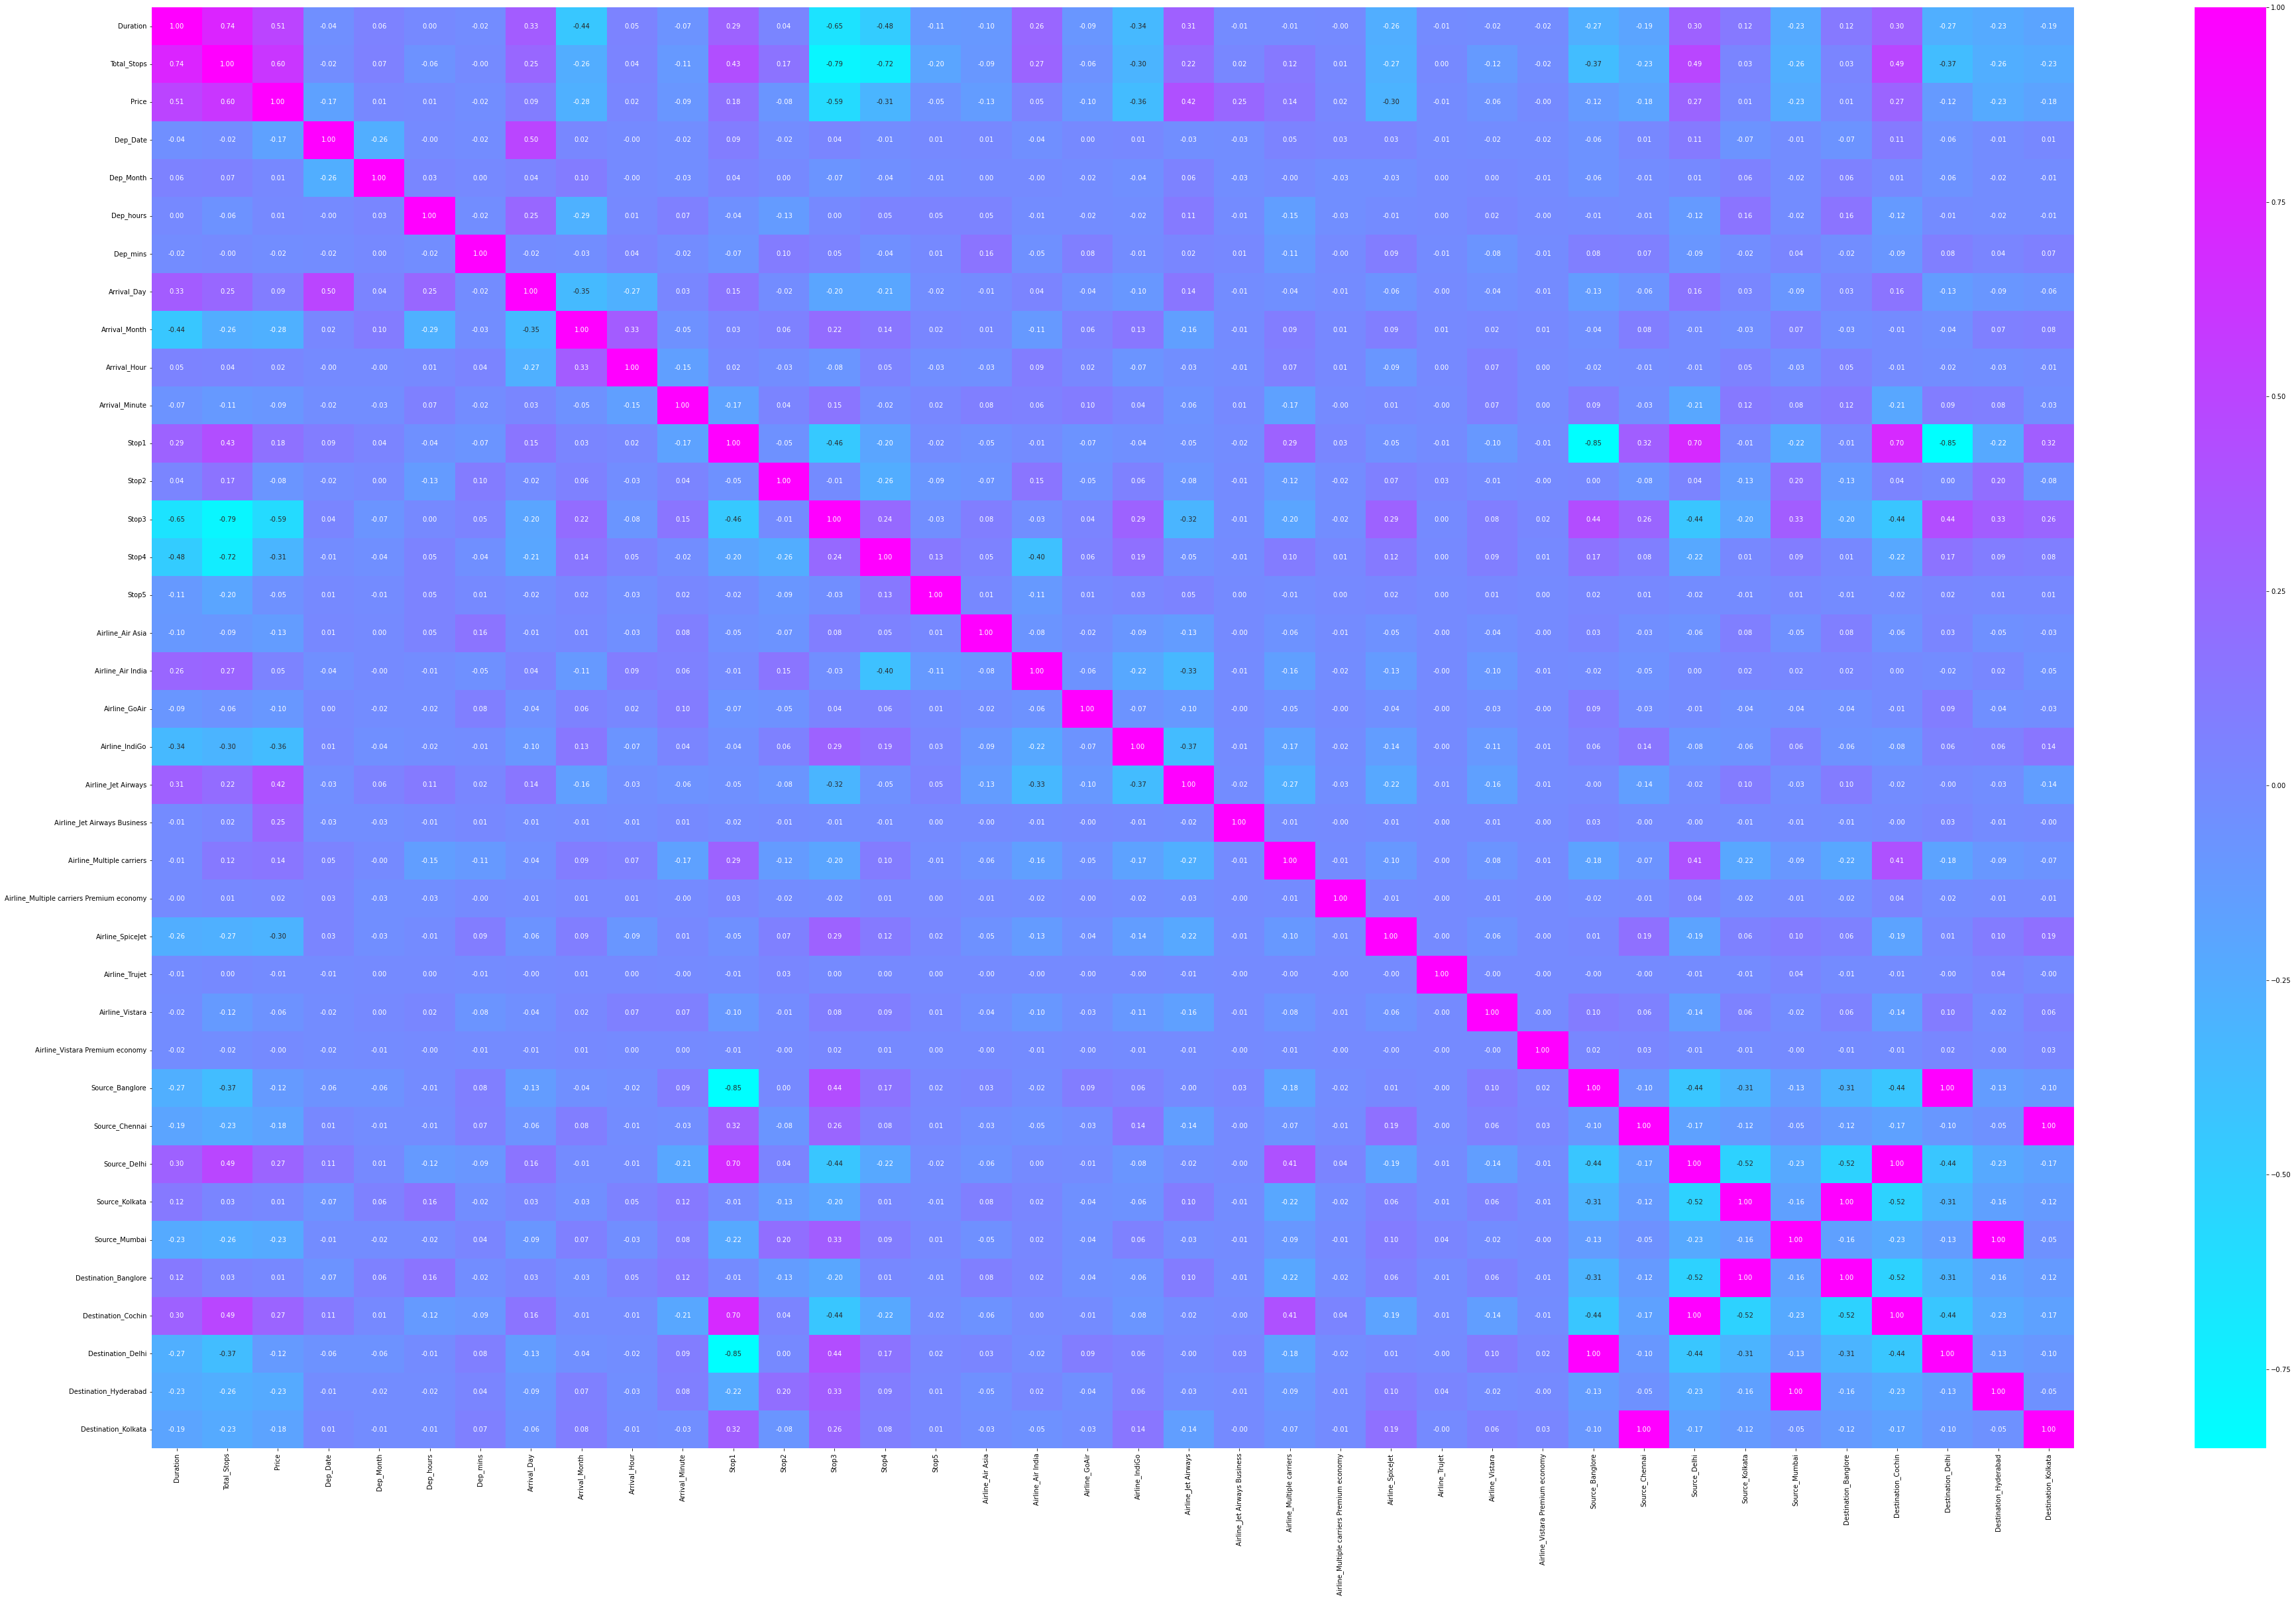

In [37]:
plt.figure(figsize=(65,40))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

Features are both Positively and Negitively correlated with the Target varriable.

Total_Stops has the highest +ve correlation and Stop3 -ve.

### There is no need to Check or Remove skewness as all the features are Categorical or Ordinal.

### Checking Outliers

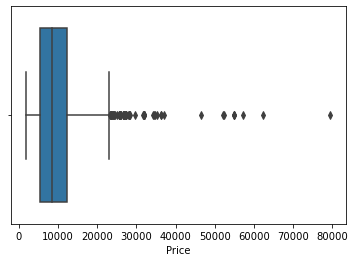

In [38]:
sns.boxplot(df['Price'])
plt.show()

In [39]:
df['Airline_Jet Airways Business'].value_counts()

0    10675
1        6
Name: Airline_Jet Airways Business, dtype: int64

In [40]:
df.describe()

,Duration,Total_Stops,Price,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,643.080236,0.824080,9086.443123,12.683831,5.534688,12.490684,24.406891,10.563243,5.496957,13.348937,24.687763,2.019474,9.666604,10.469432,9.227132,3.987454,0.029866,0.163842,0.018163,0.192210,0.360360,0.000562,0.111975,0.001217,0.076585,0.000094,0.044846,0.000281,0.205692,0.035671,0.424679,0.268795,0.065162,0.268795,0.424679,0.205692,0.065162,0.035671
std,507.816377,0.675164,4611.075357,8.803713,2.987762,5.748989,18.767046,6.153312,0.957826,6.859590,16.504975,1.206255,6.508262,7.675819,1.907677,0.200729,0.170226,0.370150,0.133547,0.394056,0.480127,0.023696,0.315350,0.034868,0.265944,0.009676,0.206975,0.016758,0.404226,0.185477,0.494317,0.443354,0.246824,0.443354,0.494317,0.404226,0.246824,0.185477
min,75.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,5.000000,8.000000,10.000000,1.000000,6.000000,4.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,520.000000,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,8.000000,6.000000,14.000000,25.000000,2.000000,7.000000,6.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,930.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,10.000000,6.000000,19.000000,35.000000,3.000000,10.000000,21.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2860.000000,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,29.000000,6.000000,23.000000,55.000000,4.000000,39.000000,26.000000,11.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
IQR = 12373-5277

low_lim = 5277 - 1.5 * IQR
up_lim = 12373 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -5367.0
up_limit is 23017.0


In [42]:
out = df[df['Price']>23017]
out.index

Int64Index([  123,   396,   486,   510,   597,   628,   657,   785,   826,
              936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
             1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
             2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
             3535,  3700,  4012,  4521,  4829,  5013,  5136,  5372,  5439,
             5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,  6314,
             6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,  7537,
             7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,  8451,
             8470,  8536,  8598,  8940,  8957,  8990,  9019,  9193,  9239,
             9632,  9715,  9974, 10052, 10113, 10160, 10182, 10189, 10353,
            10364, 10383, 10439, 10511],
           dtype='int64')

In [43]:
df_without_outliers = df.drop([  123,   396,   486,   510,   597,   628,   657,   785,   826,
              936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
             1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
             2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
             3535,  3700,  4012,  4521,  4829,  5013,  5136,  5372,  5439,
             5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,  6314,
             6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,  7537,
             7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,  8451,
             8470,  8536,  8598,  8940,  8957,  8990,  9019,  9193,  9239,
             9632,  9715,  9974, 10052, 10113, 10160, 10182, 10189, 10353,
            10364, 10383, 10439, 10511],axis=0)

In [44]:
df_without_outliers.shape

(10587, 38)

In [45]:
df.shape

(10681, 38)

### Percentage Data Loss

In [46]:
percentage_loss = (10681-10587)/10681*100
percentage_loss

0.8800674094185938

### No need to check VIF as the data is all categorical or Ordinal

## Model without Outliers

### Splitting the Data into x and y

In [47]:
X = df_without_outliers.drop('Price',axis=1)
X.shape

(10587, 37)

In [48]:
y = df_without_outliers['Price']
y.shape

(10587,)

### Scaling the Model

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
x = sc.fit_transform(X)
x = pd.DataFrame(x,columns=X.columns)
x

,Duration,Total_Stops,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,-0.928449,-1.214440,1.277508,-0.863015,1.655360,-0.230902,1.851060,-2.649874,-1.802764,-0.888669,-1.694690,0.049192,1.364203,0.405105,0.062781,-0.176259,-0.442720,-0.136625,2.038834,-0.746265,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,1.995524,-0.193212,-0.863142,-0.609841,-0.264246,-0.609841,-0.863142,1.995524,-0.264246,-0.193212
1,-0.387409,1.742955,-0.882469,-1.535577,-1.303906,1.371037,-0.423110,0.521408,-0.052263,-0.586189,-0.026860,1.586385,-1.234174,-3.258341,0.062781,-0.176259,2.258765,-0.136625,-0.490476,-0.746265,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,-0.501121,-0.193212,-0.863142,1.639771,-0.264246,1.639771,-0.863142,-0.501121,-0.264246,-0.193212
2,0.979945,1.742955,-0.768786,1.154668,-0.607608,0.036088,-0.098229,0.521408,-1.365138,0.018771,0.807055,2.662419,-0.844417,-2.211642,0.062781,-0.176259,-0.442720,-0.136625,-0.490476,1.340006,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,-0.501121,-0.193212,1.158558,-0.609841,-0.264246,-0.609841,1.158558,-0.501121,-0.264246,-0.193212
3,-0.623499,0.264258,-0.882469,2.163510,0.959062,-1.031871,-0.423110,0.521408,1.406488,0.321251,-0.026860,2.969858,-0.974336,0.405105,0.062781,-0.176259,-0.442720,-0.136625,2.038834,-0.746265,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,-0.501121,-0.193212,-0.863142,1.639771,-0.264246,1.639771,-0.863142,-0.501121,-0.264246,-0.193212
4,-0.702196,0.264258,-1.109835,-1.535577,0.610913,1.371037,-0.423110,0.521408,1.114738,0.623731,-1.694690,2.969858,-0.454661,0.405105,0.062781,-0.176259,-0.442720,-0.136625,2.038834,-0.746265,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,1.995524,-0.193212,-0.863142,-0.609841,-0.264246,-0.609841,-0.863142,1.995524,-0.264246,-0.193212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10582,-0.967797,-1.214440,-0.996152,1.154668,1.133136,1.638026,-0.423110,0.521408,1.260613,0.018771,-0.026860,-0.719404,1.364203,0.405105,0.062781,5.673455,-0.442720,-0.136625,-0.490476,-0.746265,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,-0.501121,-0.193212,-0.863142,1.639771,-0.264246,1.639771,-0.863142,-0.501121,-0.264246,-0.193212
10583,-0.957960,-1.214440,1.618557,-0.526735,1.307211,1.104047,-0.423110,0.521408,1.406488,-0.283709,-0.026860,-0.719404,1.364203,0.405105,0.062781,-0.176259,2.258765,-0.136625,-0.490476,-0.746265,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,-0.501121,-0.193212,-0.863142,1.639771,-0.264246,1.639771,-0.863142,-0.501121,-0.264246,-0.193212
10584,-0.908775,-1.214440,1.618557,-0.526735,-0.781683,-0.230902,-0.423110,0.521408,-0.344013,-0.283709,-1.694690,0.049192,1.364203,0.405105,0.062781,-0.176259,-0.442720,-0.136625,-0.490476,1.340006,0.0,-0.355186,-0.035063,-0.289177,-0.009719,-0.217688,-0.016836,1.995524,-0.193212,-0.863142,-0.609841,-0.264246,-0.609841,-0.863142,1.995524,-0.264246,-0.193212
10585,-0.948123,-1.214440,-1.109835,-1.535577,-0.259459,0.303078,-0.423110,0.521408,0.093612,-0.888669,-1.694690,0.049192,1.364203,0.405105,0.062781,-0.176259,-0.442720,-0.136625,-0.490476,-0.746265,0.0,-0.355186,-0.035063,-0.289177,-0.009719,4.593724,-0.016836,1.995524,-0.193212,-0.863142,-0.609841,-0.264246,-0.609841,-0.863142,1.995524,-0.264246,-0.193212


### PCA

In [51]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(x)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.1543689 , 0.2465638 , 0.32490551, 0.38884831, 0.44438382,
       0.49497298, 0.53570764, 0.57071048, 0.60546328, 0.63767372,
       0.66808543, 0.697472  , 0.72552786, 0.75350002, 0.78126897,
       0.80878704, 0.83541425, 0.86176895, 0.88654439, 0.90969551,
       0.92971053, 0.94743028, 0.96278121, 0.97694216, 0.98581964,
       0.99377853, 0.99936768, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [52]:
pca = PCA(n_components=27,whiten=True)
pca = pca.fit(x)
dataPCA = pca.transform(x)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

In [54]:
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
dt = DecisionTreeRegressor()
br = BaggingRegressor()
gbr = GradientBoostingRegressor()
en = ElasticNet()
models = [ridge,lasso,knn,rf,et,dt,br,gbr,en]

In [55]:
max_accuracy = 0
max_random_state = 0
for j in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=j)
    rf.fit(x_train,y_train)
    pred_test = rf.predict(x_test)
    accuracy = r2_score(y_test,pred_test)
    if accuracy > max_accuracy:
        max_accuracy =accuracy
        max_random_state = j
        best_model = i
print('Model :', rf)
print('Max Accuracy :',max_accuracy)
print('Best Random State',max_random_state)

Model : RandomForestRegressor()
Max Accuracy : 0.8381070115114584
Best Random State 8


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)
print(r2_score(y_test,pred_test))

0.8388783011182845


### Cross-Validation

In [58]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(rf,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and the accuracy score testing is {max_accuracy}")
    print()

At cross fold 2 the cv score is 0.8257057579227842 and the accuracy score testing is 0.8381070115114584

At cross fold 3 the cv score is 0.8258739030645805 and the accuracy score testing is 0.8381070115114584

At cross fold 4 the cv score is 0.824629981650796 and the accuracy score testing is 0.8381070115114584

At cross fold 5 the cv score is 0.8237502330740181 and the accuracy score testing is 0.8381070115114584

At cross fold 6 the cv score is 0.8206980702581905 and the accuracy score testing is 0.8381070115114584

At cross fold 7 the cv score is 0.8210334196637881 and the accuracy score testing is 0.8381070115114584

At cross fold 8 the cv score is 0.8194617003018658 and the accuracy score testing is 0.8381070115114584

At cross fold 9 the cv score is 0.8195652765900463 and the accuracy score testing is 0.8381070115114584



Model Report
MSE 2710470.313388732
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 82.621805732001
Difference between r2_score and cv is  1.2660243798274564


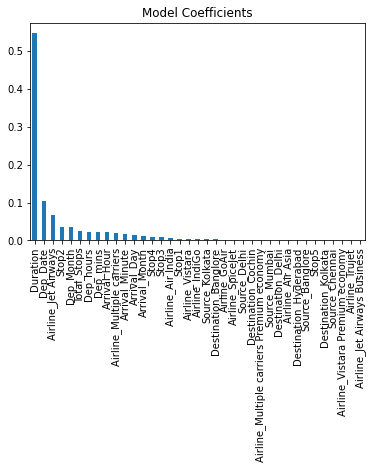

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
cv_score = cross_val_score(rf,x,y,cv = 3)
cv_score = np.abs(np.mean(cv_score))*100
print('Model Report')
print('MSE',mean_squared_error(y_test,pred))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
r2_Score = r2_score(y_test,pred_test)*100
print('r2_score',r2_Score)
print('CV', cv_score)
coef = pd.Series(rf.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients')
print('Difference between r2_score and cv is ',r2_Score-cv_score)

### Models without PCA

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)
for model in models:
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv = 3)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report :', model)
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    print('Difference between r2_score and cv is ',r2_Score-cv_score)
    print()
    print('*'*100)
    print()

Model Report : Ridge()
MSE 5868369.089208486
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 64.43691992024277
Difference between r2_score and cv is  19.450910191585677

****************************************************************************************************

Model Report : Lasso()
MSE 5868211.076372436
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 64.43873171460964
Difference between r2_score and cv is  19.449098397218805

****************************************************************************************************

Model Report : KNeighborsRegressor()
MSE 4065256.15158955
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 74.80156618134785
Difference between r2_score and cv is  9.086263930480598

****************************************************************************************************

Model Report : RandomForestRegressor()
MSE 2704550.2736472976
Mean Absolute Error 1068.061433008402
r2_score 83.

### Models with PCA

In [61]:
x_train,x_test,y_train,y_test = train_test_split(dataPCA,y,test_size=0.3,random_state=8)
for model in models:
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv = 3)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report :', model)
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    print('Difference between r2_score and cv is ',r2_Score-cv_score)
    print()
    print('*'*100)
    print()

Model Report : Ridge()
MSE 5932947.199002913
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 64.43691992024277
Difference between r2_score and cv is  19.450910191585677

****************************************************************************************************

Model Report : Lasso()
MSE 5932785.523851684
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 64.43873171460964
Difference between r2_score and cv is  19.449098397218805

****************************************************************************************************

Model Report : KNeighborsRegressor()
MSE 4059080.77732452
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 74.80156618134785
Difference between r2_score and cv is  9.086263930480598

****************************************************************************************************

Model Report : RandomForestRegressor()
MSE 4094603.0676042847
Mean Absolute Error 1068.061433008402
r2_score 83.

#### We see the model with PCA have a marginaly lower score than the one without so we would continue without PCA

### HyperParameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)

In [63]:
rf = RandomForestRegressor()
parameters = {'n_estimators': list(range(25,501,25)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2,3,5,None],
               'min_samples_split': [1,2,3,4]}
gcv= GridSearchCV(rf,parameters,cv=3,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 200}

In [64]:
gcv.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=200)

In [66]:
def Model(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    cv_score = cross_val_score(model,x,y,cv = 3)
    cv_score = np.abs(np.mean(cv_score))*100
    print('Model Report')
    print('MSE',mean_squared_error(y_test,pred))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    r2_Score = r2_score(y_test,pred_test)*100
    print('r2_score',r2_Score)
    print('CV', cv_score)
    print('Difference between r2_score and cv is ',r2_Score-cv_score)

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,min_samples_split =4)
Model(rf)

Model Report
MSE 2544461.0014301054
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 83.65096704618097
Difference between r2_score and cv is  0.2368630656474835


In [76]:
br = BaggingRegressor()

parameters = {'n_estimators':[5,10,15,20,30]
             }
gcv= GridSearchCV(br,parameters,cv=3,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'n_estimators': 20}

In [77]:
gcv.best_estimator_

BaggingRegressor(n_estimators=20)

In [78]:
br = BaggingRegressor(n_estimators=20)
Model(br)

Model Report
MSE 2741642.662626823
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 82.27925771109733
Difference between r2_score and cv is  1.60857240073112


### Best Model : RandomForestRegressor with HyperParameter Tuning

Model Report
MSE 2532662.131979107
Mean Absolute Error 1068.061433008402
r2_score 83.88783011182845
CV 83.64597959967273
Difference between r2_score and cv is  0.24185051215572173


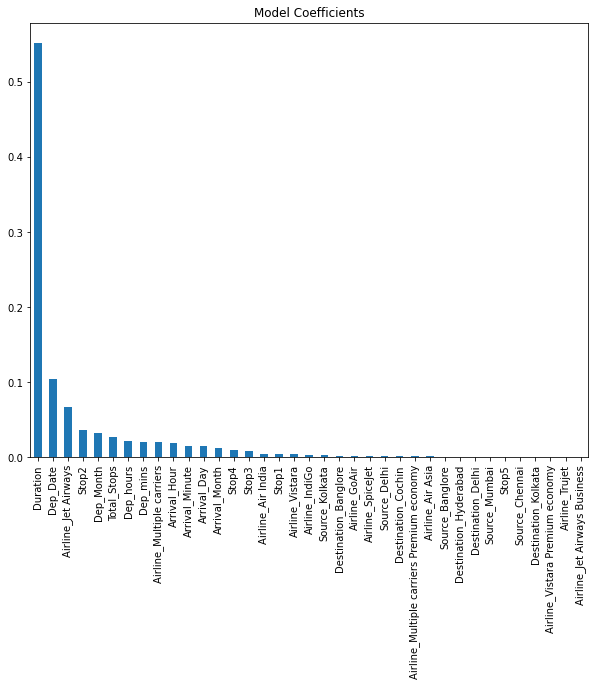

In [79]:
rf = RandomForestRegressor(n_estimators=225,min_samples_split =4)
Model(rf)
coef = pd.Series(rf.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(10,8))
plt.show()

### Saving the Best Model

In [82]:
import pickle
file_name = 'flight_price_prediction.pkl'
pickle.dump(rf,open(file_name,'wb'))

### Test Data

In [83]:
df_test = pd.read_excel(r'C:\Users\prate\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [84]:
df_test.shape

(2671, 10)

In [85]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [86]:
df_test['Dep_Date'] = pd.to_datetime(df_test['Date_of_Journey']).dt.day
df_test['Dep_Month'] = pd.to_datetime(df_test['Date_of_Journey']).dt.month
df_test.drop('Date_of_Journey',axis=1,inplace=True)
df_test.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_Date,Dep_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5


In [87]:
df_test['Dep_hours'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_mins'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop('Dep_Time',axis=1,inplace=True)
df_test.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_Date,Dep_Month,Dep_hours,Dep_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15


In [88]:
df_test['Arrival_Day'] = pd.to_datetime(df_test['Arrival_Time']).dt.day
df_test['Arrival_Month'] = pd.to_datetime(df_test['Arrival_Time']).dt.month
df_test['Arrival_Hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_Minute'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop('Arrival_Time',axis=1,inplace=True)
df_test.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,7,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,8,6,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,22,5,19,0


In [89]:
df_test['Duration_hour']=df_test['Duration'].str.split(' ').str[0].str.strip('h')
df_test['Duration_min']=df_test['Duration'].str.split(' ').str[1].str.strip('m')
df_test.drop(2660,axis=0,inplace=True)
df_test['Duration_min'] = df_test['Duration_min'].fillna(0)
df_test['Duration_hour'] = df_test['Duration_hour'].astype(int)*60
df_test['Duration_min'] = df_test['Duration_min'].astype(int)
df_test['Duration'] = df_test['Duration_hour']+df_test['Duration_min']
df_test.drop(['Duration_hour','Duration_min'],axis=1,inplace=True)
df_test.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,7,6,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,8,6,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,22,5,19,0


In [90]:
df_test.drop('Additional_Info',axis=1,inplace=True)

In [91]:
df_test['Stop1'] = df_test['Route'].str.split(' → ').str[0]
df_test['Stop2'] = df_test['Route'].str.split(' → ').str[1]
df_test['Stop3'] = df_test['Route'].str.split(' → ').str[2]
df_test['Stop4'] = df_test['Route'].str.split(' → ').str[3]
df_test['Stop5'] = df_test['Route'].str.split(' → ').str[4]
df_test = df_test.fillna('None')
df_test.drop('Route',axis=1,inplace=True)
df_test.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6,17,30,7,6,4,25,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,240,1 stop,5,12,6,20,8,6,10,20,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5,19,15,22,5,19,0,DEL,BOM,COK,None,None


In [92]:
df_test['Total_Stops'] = df_test['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})
df_test.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5
0,Jet Airways,Delhi,Cochin,655,1,6,6,17,30,7,6,4,25,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,240,1,5,12,6,20,8,6,10,20,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,1425,1,21,5,19,15,22,5,19,0,DEL,BOM,COK,None,None


In [93]:
df_test['Destination'] = df_test['Destination'].replace('New Delhi','Delhi')
df_test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [94]:
df_test = pd.get_dummies(df_test,columns=['Airline','Source','Destination'])
df_test['Airline_Trujet'] = 0
df_test

,Duration,Total_Stops,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Airline_Trujet
0,655,1,6,6,17,30,7,6,4,25,DEL,BOM,COK,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,240,1,5,12,6,20,8,6,10,20,CCU,MAA,BLR,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1425,1,21,5,19,15,22,5,19,0,DEL,BOM,COK,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,780,1,21,5,8,0,8,6,21,0,DEL,BOM,COK,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,170,0,24,6,23,55,25,6,2,45,BLR,DEL,None,None,None,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,1,6,6,20,30,7,6,20,25,CCU,DEL,BLR,None,None,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2667,155,0,27,3,14,20,8,6,16,55,CCU,BLR,None,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2668,395,1,3,6,21,50,7,3,4,25,DEL,BOM,COK,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2669,915,1,3,6,4,0,8,6,19,15,DEL,BOM,COK,None,None,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [95]:
df_test['Stop1'] = le.fit_transform(df_test['Stop1'])
df_test['Stop2'] = le.fit_transform(df_test['Stop2'])
df_test['Stop3'] = le.fit_transform(df_test['Stop3'])
df_test['Stop4'] = le.fit_transform(df_test['Stop4'])
df_test['Stop5'] = le.fit_transform(df_test['Stop5'])
df_test

,Duration,Total_Stops,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Airline_Trujet
0,655,1,6,6,17,30,7,6,4,25,3,6,5,6,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,240,1,5,12,6,20,8,6,10,20,2,24,3,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1425,1,21,5,19,15,22,5,19,0,3,6,5,6,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,780,1,21,5,8,0,8,6,21,0,3,6,5,6,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,170,0,24,6,23,55,25,6,2,45,0,10,18,6,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,1,6,6,20,30,7,6,20,25,2,10,3,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2667,155,0,27,3,14,20,8,6,16,55,2,5,18,6,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2668,395,1,3,6,21,50,7,3,4,25,3,6,5,6,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2669,915,1,3,6,4,0,8,6,19,15,3,6,5,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [96]:
test = sc.fit_transform(df_test)
x_testing = pd.DataFrame(test,columns=df_test.columns)
x_testing

,Duration,Total_Stops,Dep_Date,Dep_Month,Dep_hours,Dep_mins,Arrival_Day,Arrival_Month,Arrival_Hour,Arrival_Minute,Stop1,Stop2,Stop3,Stop4,Stop5,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Airline_Trujet
0,0.029919,0.248597,-0.704263,0.129959,0.773395,0.268233,-0.553644,0.522543,-1.361355,0.027031,0.832770,-0.594719,-0.611185,0.399676,0.05909,-0.182433,-0.443591,-0.132403,-0.486501,1.405912,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,1.154070,-0.601868,-0.272849,-0.601868,1.154070,-0.512261,-0.272849,-0.170005,0.0
1,-0.796714,0.248597,-0.821049,2.103360,-1.161081,-0.255867,-0.379222,0.522543,-0.509112,-0.271208,0.000000,2.734598,-0.921513,0.399676,0.05909,-0.182433,-0.443591,-0.132403,2.055492,-0.711282,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,-0.866499,1.661494,-0.272849,1.661494,-0.866499,-0.512261,-0.272849,-0.170005,0.0
2,1.563672,0.248597,1.047537,-0.198942,1.125118,-0.517917,2.062692,-0.504087,0.769254,-1.464163,0.832770,-0.594719,-0.611185,0.399676,0.05909,-0.182433,-0.443591,-0.132403,-0.486501,1.405912,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,1.154070,-0.601868,-0.272849,-0.601868,1.154070,-0.512261,-0.272849,-0.170005,0.0
3,0.278905,0.248597,1.047537,-0.198942,-0.809358,-1.304066,-0.379222,0.522543,1.053335,-1.464163,0.832770,-0.594719,-0.611185,0.399676,0.05909,-0.182433,-0.443591,-0.132403,-0.486501,-0.711282,-0.027379,2.587378,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,1.154070,-0.601868,-0.272849,-0.601868,1.154070,-0.512261,-0.272849,-0.170005,0.0
4,-0.936146,-1.239640,1.397896,0.129959,1.828564,1.578483,2.585960,0.522543,-1.645436,1.219987,-1.665541,0.145129,1.405951,0.399676,0.05909,5.481470,-0.443591,-0.132403,-0.486501,-0.711282,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,1.952130,-0.170005,-0.866499,-0.601868,-0.272849,-0.601868,-0.866499,1.952130,-0.272849,-0.170005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,1.583591,0.248597,-0.704263,0.129959,1.300980,0.268233,-0.553644,0.522543,0.911294,0.027031,0.000000,0.145129,-0.921513,0.399676,0.05909,-0.182433,2.254330,-0.132403,-0.486501,-0.711282,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,-0.866499,1.661494,-0.272849,1.661494,-0.866499,-0.512261,-0.272849,-0.170005,0.0
2666,-0.966024,-1.239640,1.748256,-0.856742,0.245811,-0.255867,-0.379222,0.522543,0.343132,1.816465,0.000000,-0.779681,1.405951,0.399676,0.05909,-0.182433,-0.443591,-0.132403,2.055492,-0.711282,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,-0.866499,1.661494,-0.272849,1.661494,-0.866499,-0.512261,-0.272849,-0.170005,0.0
2667,-0.487971,0.248597,-1.054622,0.129959,1.476841,1.316433,-0.553644,-2.557345,-1.361355,0.027031,0.832770,-0.594719,-0.611185,0.399676,0.05909,-0.182433,-0.443591,-0.132403,-0.486501,1.405912,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,1.154070,-0.601868,-0.272849,-0.601868,1.154070,-0.512261,-0.272849,-0.170005,0.0
2668,0.547810,0.248597,-1.054622,0.129959,-1.512804,-1.304066,-0.379222,0.522543,0.769254,-0.569446,0.832770,-0.594719,-0.611185,0.399676,0.05909,-0.182433,2.254330,-0.132403,-0.486501,-0.711282,-0.027379,-0.386492,-0.033539,-0.290662,-0.225316,-0.027379,-0.512261,-0.170005,1.154070,-0.601868,-0.272849,-0.601868,1.154070,-0.512261,-0.272849,-0.170005,0.0


### Reading Pickle file and Predicting Test Data

In [97]:
Model = pd.read_pickle(r'flight_price_prediction.pkl')

In [98]:
Model

RandomForestRegressor(min_samples_split=4, n_estimators=225)

In [99]:
test_pred = Model.predict(x_testing)

In [100]:
test_pred

array([10553.67612169,  4570.86440404, 12961.94485185, ...,
       15538.0623545 , 13065.88384127,  7750.34771076])

In [101]:
pd.options.display.max_rows=None
y = pd.Series(test_pred)

In [102]:
y

0       10553.676122
1        4570.864404
2       12961.944852
3       11377.978571
4        3764.197619
5       10223.924099
6        9040.488032
7        5895.423032
8        5028.240275
9       12859.534402
10       9757.164104
11       6125.455330
12      14500.966317
13      15185.787822
14      10926.705116
15      16709.549753
16       8603.605254
17       7392.761138
18      10542.185032
19      13758.919963
20      13906.304667
21      12405.064486
22      12974.087958
23      11681.131370
24       5791.405608
25      10189.530799
26       4234.661063
27      13201.906857
28      12194.472804
29      13061.297079
30       6789.453751
31       7329.991974
32      13985.566247
33       6632.053847
34       5549.897656
35       3979.889032
36       4996.152249
37      18178.430667
38      12436.880974
39       7591.419291
40       4090.062624
41      12157.402437
42       2840.915767
43       9183.819573
44       6674.524302
45       3439.648330
46      17380.027979
47       3809